In [239]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [240]:
df=pd.read_csv('C:/Users/areum/Desktop/POC시연자료/이원분산분석.csv')

In [241]:
df = df.dropna(axis=0)

In [242]:
df['sex'] = df['sex'].map({'여자':0, '남자':1})

In [243]:
df=df.dropna()

In [244]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [245]:
df['sex'] = df['sex'].astype('int')

In [246]:
df=df[df.age != '#VALUE!']

In [247]:
df['age']=df['age'].astype('int')

In [248]:
df.to_csv("C:/Users/areum/Desktop/POC시연자료/anova.csv", index=False)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7979 entries, 1 to 8910
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sex     7979 non-null   int32
 1   age     7979 non-null   int32
 2   total   7979 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 187.0 KB


<AxesSubplot:title={'center':'total'}, xlabel='sex'>

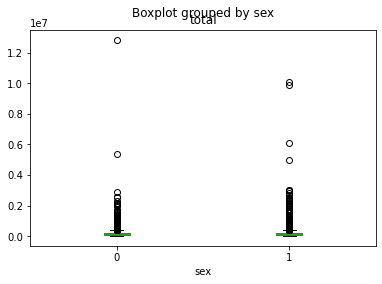

In [250]:
df.boxplot(column = 'total', by='sex' , grid = False)

<AxesSubplot:title={'center':'total'}, xlabel='age'>

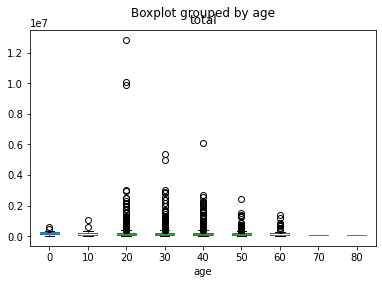

In [219]:
import warnings
plt.rcParams['font.family'] = 'NanumGothic'
warnings.filterwarnings(action='ignore')
df.boxplot(column = 'total', by='age' , grid = False)

In [220]:
model = ols('total~ C(age) * C(sex)',df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(age),8.0,6.519220e+11,8.149024e+10,0.779867,0.620497
C(sex),1.0,3.959721e+10,3.959721e+10,0.378948,0.538184
C(age):C(sex),8.0,1.510634e+12,1.888292e+11,1.807108,0.070783
Residual,7965.0,8.322827e+14,1.044925e+11,NaN,NaN


In [223]:
df.columns = ['independ1','independ2','depend']

In [224]:
df['independ1'].unique()

array([0, 1])

In [225]:
colour = ['red', 'green', 'blue', 'yellow', 'pink', 'purple', 'gray', 'navy', 'brown']

df_new = df.drop_duplicates(subset = "independ1")
df_new= sorted(df_new['independ1'])

In [226]:
group=[]
match={}
for i in range(len(df_new)):
    group.append(str(df_new[i]))
    match[group[i]]=colour[i]

In [228]:
df['independ1']=df['independ1'].astype(str)

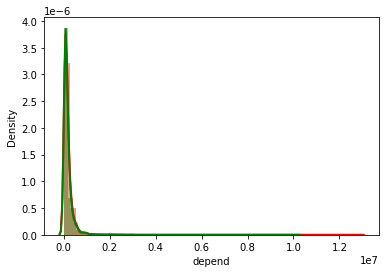

In [229]:
for group in match:
    subset = df[df['independ1'] == group]
    sns.distplot(subset['depend'],
                 hist = True,
                 kde = True,
                 kde_kws = {'linewidth': 2},
                 color = match[group],
                 label = group)

In [233]:
def histogram(df, independ):
    colour = ['red', 'green', 'blue', 'yellow', 'pink', 'purple', 'gray', 'navy', 'brown']
    df_new = df.drop_duplicates(subset=independ)
    df_new = sorted(df_new[independ])
    df[independ] = df[independ].astype(str)

    group = []
    match = {}
    for i in range(len(df_new)):
        group.append(str(df_new[i]))
        match[group[i]] = colour[i]

    for group in match:
        subset = df[df[independ] == group]
        sns.distplot(subset['depend'], hist=True, kde=True, kde_kws={'linewidth': 2}, color=match[group],label=group)
    plt.xlim(df['depend'].min(), df['depend'].max())
    plt.title(independ+"분류에 의한 종속변수 분포")
    plt.legend(prop={'size': 12}, title='group')
    plt.show()

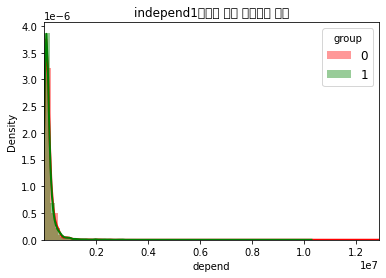

In [234]:
histogram(df, 'independ1')